Here you should:


*   upload paris_medals.csv.
*   upload tokyo_medals.csv.



# **Imports**

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# **Load data files**

In [100]:
paris=pd.read_csv('paris_medals.csv')
tokyo = pd.read_csv('tokyo_medals.csv')

# **Datasets filteration for Egyptian athletes**

In [101]:
#Here we filter datasets for Egyptian athletes in both Olympics
egypt_paris = paris[paris['country_code'] == 'EGY']
egypt_tokyo = tokyo[tokyo['NOC'] == 'EGY']

#Here we check for our datasets after filteration
#egypt_tokyo.head()
#egypt_paris.head()

# **Datasets filteration by age for Egyptian athletes**

In [102]:
#Here we filter athletes into
#in-range age groups: 22-30
#out-range age groups: smaller and larger than in range

paris_in_range = egypt_paris[(egypt_paris['age'] >= 22) & (egypt_paris['age'] <= 30)]
paris_out_range = egypt_paris[(egypt_paris['age'] < 22) | (egypt_paris['age'] > 30)]

tokyo_in_range = egypt_tokyo[(egypt_tokyo['Age'] >= 22) & (egypt_tokyo['Age'] <= 30)]
tokyo_out_range = egypt_tokyo[(egypt_tokyo['Age'] < 22) | (egypt_tokyo['Age'] > 30)]

# **Count Egyptian athletes ages won medals**

In [103]:
#Here we count medals won by each age range group
paris_in_range_medals = len(paris_in_range)
paris_out_range_medals = len(paris_out_range)

tokyo_in_range_medals = len(tokyo_in_range)
tokyo_out_range_medals = len(tokyo_out_range)

#Here we combine the medal counts into a DataFrame for to start comparison
combined_data = pd.DataFrame({
    'Paris 2024 (22-30)': [paris_in_range_medals],
    'Paris 2024 (Other)': [paris_out_range_medals],
    'Tokyo 2020 (22-30)': [tokyo_in_range_medals],
    'Tokyo 2020 (Other)': [tokyo_out_range_medals]
})

# **Calculate medal winning rate based on age**

In [104]:
#Here we calculate medal-winning rate for each range age group
paris_in_range_winning_rate = len(paris_in_range) / len(egypt_paris)
paris_out_range_winning_rate = len(paris_out_range) / len(egypt_paris)

tokyo_in_range_winning_rate = len(tokyo_in_range) / len(egypt_tokyo)
tokyo_out_range_winning_rate = len(tokyo_out_range) / len(egypt_tokyo)

# **Stacked Bar Chart to give number of medals within each age group**

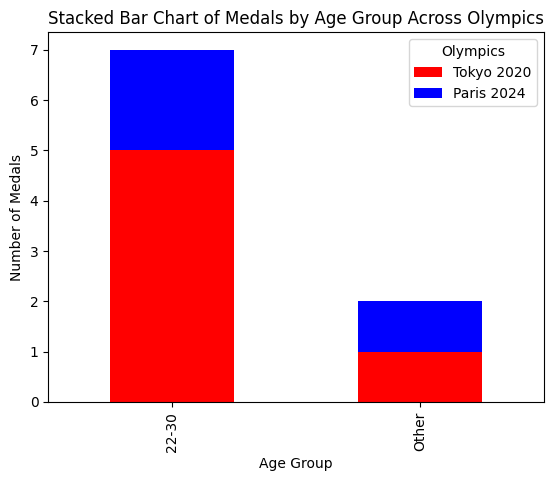

In [111]:
#Here we prepare our data for stacked bar chart
stacked_data = pd.DataFrame({
    'Tokyo 2020': [tokyo_in_range_medals, tokyo_out_range_medals],
    'Paris 2024': [paris_in_range_medals, paris_out_range_medals]
}, index=['22-30', 'Other'])

#Here we display stacked bar chart
stacked_data.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title('Stacked Bar Chart of Medals by Age Group Across Olympics')
plt.xlabel('Age Group')
plt.ylabel('Number of Medals')
plt.legend(title='Olympics')
plt.show()

#**Pie Chart for winning medals within each age group in Tokyo 2020 and Paris 2024**

#Tokyo 2020

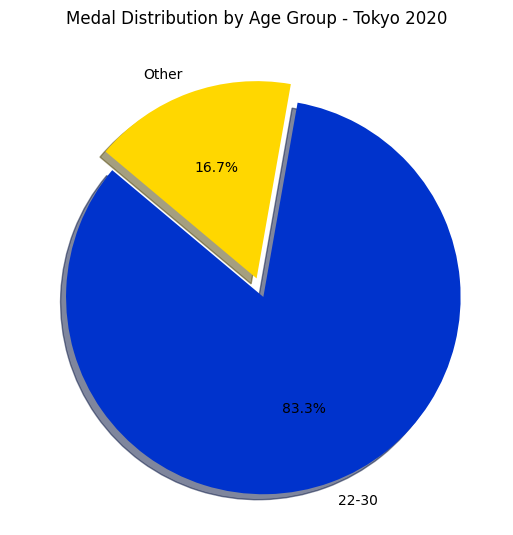

In [129]:
#Here we prepare our data for pie chart
tokyo_labels = ['22-30', 'Other']
tokyo_sizes = [tokyo_in_range_medals, tokyo_out_range_medals]
tokyo_colors = ['#0033cc','gold']
tokyo_explode = (0.1, 0)

#Here we display our pie chart
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(tokyo_sizes, explode=tokyo_explode, labels=tokyo_labels, colors=tokyo_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Medal Distribution by Age Group - Tokyo 2020')
plt.show()

# Paris 2024

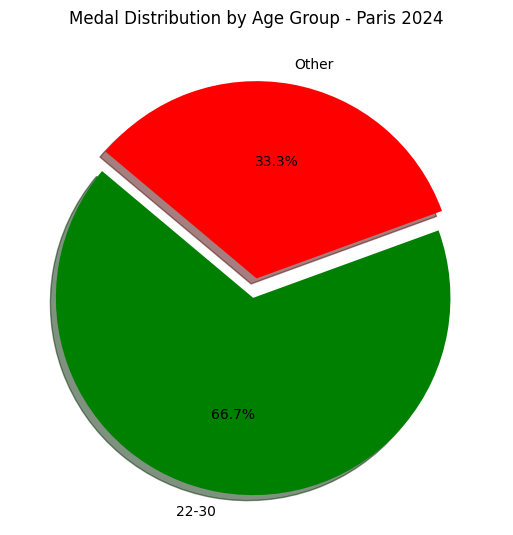

In [125]:
#Here we prepare our data for pie chart
paris_labels = ['22-30', 'Other']
paris_sizes = [paris_in_range_medals, paris_out_range_medals]
paris_colors = ['green','red']
paris_explode = (0.1, 0)  # "explode" the 22-30 slice

#Here we display our pie chart
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)
plt.pie(paris_sizes, explode=paris_explode, labels=paris_labels, colors=paris_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Medal Distribution by Age Group - Paris 2024')
plt.show()

# **Line Chart to compare medal-winning rates**

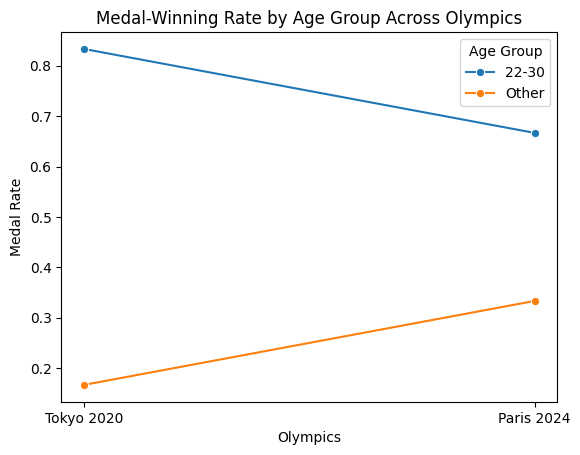

In [108]:
#Here we prepare our data for line chart
line_data = pd.DataFrame({
    'Olympics': ['Tokyo 2020', 'Tokyo 2020', 'Paris 2024', 'Paris 2024'],
    'Age Group': ['22-30', 'Other', '22-30', 'Other'],
    'Medal Rate': [tokyo_in_range_winning_rate, tokyo_out_range_winning_rate, paris_in_range_winning_rate, paris_out_range_winning_rate]
})

#Here we display line chart
sns.lineplot(data=line_data, x='Olympics', y='Medal Rate', hue='Age Group', marker='o')
plt.title('Medal-Winning Rate by Age Group Across Olympics')
plt.show()

# **Heatmap**

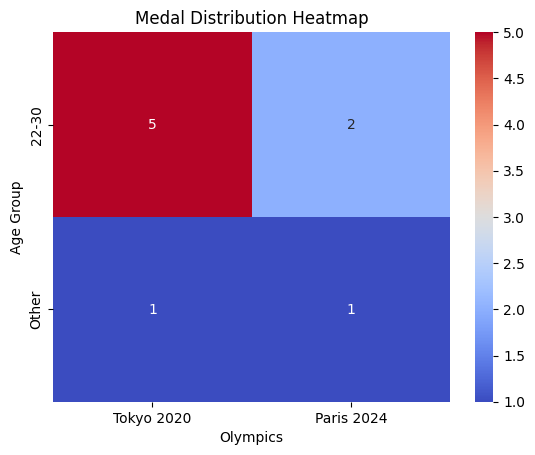

In [109]:
#Here we prepare our data heatmap
heatmap_data = pd.DataFrame({
    'Tokyo 2020': [tokyo_in_range_medals, tokyo_out_range_medals],
    'Paris 2024': [paris_in_range_medals, paris_out_range_medals],
}, index=['22-30', 'Other'])

#Here we display heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Medal Distribution Heatmap')
plt.xlabel('Olympics')
plt.ylabel('Age Group')
plt.show()

# **t-test**

In [110]:
#Here we combine data into two groups for t-test analysis
group1 = [tokyo_in_range_winning_rate,paris_in_range_winning_rate]
group2 = [tokyo_out_range_winning_rate,paris_out_range_winning_rate]

#Here we perform our t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
t_stat, p_value

(4.242640687119284, 0.051316701949486225)